# Statistics Demo

This Jupyter Notebook code is to demonstrate Statistical value calculation and comparing manaully (for instance, write a code without using library/modules) vs using modules.

And trying to make plot values using seaborn, matplotlib and export to PNG

12201449 Chan Woo, Choi

Py_Renewable

-------------------------------------------------------------

Plot Data save location :'code location' /output/plot/~~~~.png (dpi as 400)

Modified Dataset save location : 'code location' /output/Modified_Dataset.csv

Statistical Data save location : 'code location' /output/Statistical_Data.csv

Statistical Data save location(Manual) : 'code location' /output/Statistical_Data_Manual.csv

(Plot Data and Statiscal Data is used for reports as well)

-------------------------------------------------------------

Input Data must be with the code, or you can`t load the data properly!

(Input : processed_solar_farm.csv)

# Baseline 1. Loading Libraries, and Loading the dataset and make it as dataframe

In [634]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [635]:
solar_df = pd.read_csv('processed_solar_farm.csv')
solar_df

# Loading processed_solar_farm.csv, save it as dataframe named solar_df
# then show the solar_df dataframe

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,angle_of_incidence,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,6.37,312.71,58.753108,128.335430,454.100950
1,2.31,27,1035.1,0.0,0.0,5.15,294.78,45.408585,139.655300,1411.999400
2,3.65,33,1035.4,0.0,0.0,4.68,270.00,32.848282,152.537690,2214.849300
3,5.82,30,1035.4,0.0,0.0,3.60,323.13,22.699288,166.901590,2527.609200
4,7.73,27,1034.4,0.0,0.0,6.21,10.01,19.199908,182.135260,2640.203400
...,...,...,...,...,...,...,...,...,...,...
995,12.05,36,1023.0,0.0,0.0,37.04,158.92,21.050278,209.491090,335.647780
996,11.69,36,1022.3,0.0,0.0,33.43,157.85,34.429888,229.593420,128.594700
997,12.69,34,1021.5,0.0,0.0,35.31,156.57,48.767577,244.839680,60.467734
998,12.30,38,1021.0,0.0,0.0,33.50,151.78,63.395698,256.941460,15.597349


So, as you can see, we successfully import dataset as a dataframe named 'solar_df' with labels.

Now we head onto next step, which is modifying dataframe

# 1. Adding new feature on the Dataframe

Now for modifying (which also means adding new column in this case), we could easily do as well with some arguments

So let`s say we want to make new column as 'weather', and following is the argument for how to decide 'weather'

Arguments :

If temperature_2_m_above <= 15, 'weather' is named 'cold'

Else 'weather' is named 'warm'

In [636]:
# numpy method (np.where)

solar_df['weather'] = np.where(solar_df['temperature_2_m_above_gnd'] > 15, 'warm', 'cold')
# loading temperature_2_m_above and making another column and data based on the argument
# (if temp > 15 , goes to warm, if else cold)

In [637]:
# boolean indexing method (extra method)

#solar_df['weather'] = 'cold'
#solar_df.loc[solar_df['temperature_2_m_above_gnd'] > 15, 'weather'] = 'warm'

In [638]:
solar_df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,angle_of_incidence,azimuth,generated_power_kw,weather
0,2.17,31,1035.0,0.0,0.0,6.37,312.71,58.753108,128.335430,454.100950,cold
1,2.31,27,1035.1,0.0,0.0,5.15,294.78,45.408585,139.655300,1411.999400,cold
2,3.65,33,1035.4,0.0,0.0,4.68,270.00,32.848282,152.537690,2214.849300,cold
3,5.82,30,1035.4,0.0,0.0,3.60,323.13,22.699288,166.901590,2527.609200,cold
4,7.73,27,1034.4,0.0,0.0,6.21,10.01,19.199908,182.135260,2640.203400,cold
...,...,...,...,...,...,...,...,...,...,...,...
995,12.05,36,1023.0,0.0,0.0,37.04,158.92,21.050278,209.491090,335.647780,cold
996,11.69,36,1022.3,0.0,0.0,33.43,157.85,34.429888,229.593420,128.594700,cold
997,12.69,34,1021.5,0.0,0.0,35.31,156.57,48.767577,244.839680,60.467734,cold
998,12.30,38,1021.0,0.0,0.0,33.50,151.78,63.395698,256.941460,15.597349,cold


# 2. Manual (Brute-Force) Calculation on Stastistics Values (Mean, Variance, Standard Deviation, Skewness, Kurtosis)

In this section, this will be a long code for it, since this is not using any libraries and using only basics like sum, len.

Also, there will be bunch of functions defined as well.

* DDOF (Degrees Of Freedom) is 1

In [639]:
temper = solar_df['temperature_2_m_above_gnd'].tolist() 
# making list of temp data for stastical calculation

In [640]:
def mean(values):
    return sum(values) / len(values)

In [641]:
def var(values):
    m = mean(values)
    return sum((x - m) ** 2 for x in values) / (len(values) - 1)

In [642]:
def std_dev(values):
    return var(values) ** 0.5 # we could use np.sqrt , but remember, no additional libraries this time. Only Barebones

In [643]:
def skewness(values):
    n = len(values)
    m = mean(values)
    s = std_dev(values)
    num = sum((x - m) ** 3 for x in values)
    if s == 0:
        return 0.0 # if s is zero, you want to divide it by zero? i would not like that
    return (n / ((n - 1) * (n - 2))) * (num / (s ** 3))

In [644]:
def kurtosis(values):
    n = len(values)
    m = mean(values)
    s = std_dev(values)
    numerator = sum((x - m) ** 4 for x in values)
    if s == 0:
        return 0.0 # again, if s is zero, you want to divide it by zero? i would not like that
    term1 = (n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3)) * (numerator / (s ** 4))
    term2 = 3 * (n - 1) ** 2 / ((n - 2) * (n - 3))
    return term1 - term2

In [645]:
temper_mean = mean(temper)
temper_variance = var(temper)
temper_std_dev = std_dev(temper)
temper_skewness = skewness(temper)
temper_kurtosis = kurtosis(temper)

print("Statistics Value for 'temperature' using Brute Force Method :")
print(f"Mean: {temper_mean}")
print(f"Variance: {temper_variance}")
print(f"Standard Deviation: {temper_std_dev}")
print(f"Skewness: {temper_skewness}")
print(f"Kurtosis: {temper_kurtosis}")

Statistics Value for 'temperature' using Brute Force Method :
Mean: 6.9011700000000005
Variance: 35.68649822932933
Standard Deviation: 5.973817726490266
Skewness: 0.3431494568690903
Kurtosis: -0.5860388588355163


# 3. Std.Library Calculation on Stastistics Values (Mean, Variance, Standard Deviation, Skewness, Kurtosis)

This time, time to use standard module for finding same values as we have found manually.

Will be using Numpy and Scipy.stats for this process and will compare both on value diffrence and code-sides

And for bonus, will be using pandas` built-in method as well, which you could actually derive data directly from Dataframe without the need to declare another array or list

Dataframe using for statstic values are the same, temper

In [646]:
# Numpy, Scipy method

temper_mean_std = np.mean(temper)
temper_variance_std = np.var(temper, ddof=1) 
temper_std_dev_std = np.std(temper, ddof=1)
temper_skewness_std_F = stats.skew(temper, bias=False)
temper_kurtosis_std_FT = stats.kurtosis(temper, bias=False, fisher=True)

In [647]:
# Pandas method

temper_mean_pd = solar_df['temperature_2_m_above_gnd'].mean()
temper_variance_pd = solar_df['temperature_2_m_above_gnd'].var()
temper_std_dev_pd = solar_df['temperature_2_m_above_gnd'].std()
temper_skewness_pd = solar_df['temperature_2_m_above_gnd'].skew()
temper_kurtosis_pd = solar_df['temperature_2_m_above_gnd'].kurt()

In [648]:
print("Statistics Value for 'temperature' using Numpy, Scipy :")

print(f"Mean: {temper_mean_std}")
print(f"Variance (ddof 1): {temper_variance_std}")
print(f"Standard Deviation (ddof 1): {temper_std_dev_std}")
print(f"Skewness : {temper_skewness_std_F}")
print(f"Kurtosis : {temper_kurtosis_std_FT}")


Statistics Value for 'temperature' using Numpy, Scipy :
Mean: 6.9011700000000005
Variance (ddof 1): 35.686498229329324
Standard Deviation (ddof 1): 5.973817726490266
Skewness : 0.3431494568690903
Kurtosis : -0.5860388588355159


In [649]:
print("Statistics Value for 'temperature' using Pandas :")

print(f"Mean: {temper_mean_pd}")
print(f"Variance: {temper_variance_pd}")
print(f"Standard Deviation: {temper_std_dev_pd}")
print(f"Skewness: {temper_skewness_pd}")
print(f"Kurtosis: {temper_kurtosis_pd}")

Statistics Value for 'temperature' using Pandas :
Mean: 6.9011700000000005
Variance: 35.6864982293293
Standard Deviation: 5.973817726490264
Skewness: 0.3431494568690902
Kurtosis: -0.5860388588355168


# Baseline 2. Making Directory for Plot data,and Making Locational Variable for saving in other Directories

Before Going on Plotting and saving full final data, it is important to set Directories for saving plot images and Datasets for future uses, so this is more like making baseline

Since when you run the code for the first time, there should be some process for making empty directories, then make a path where you want to save the plot image(or pdf) and final datasets

In [650]:
output_plot = os.path.join('output', 'plot') # setting directory as output/plot (for other plots)
output_plot_var = os.path.join('output', 'plot', 'var_hist') # setting directory as output/plot/var_hist, this is for histogram (Part 6)

os.makedirs(output_plot_var, exist_ok=True) # making empty directoy output/plot/var_hist

# 3. Plotting Histogram and Boxplot of Generated Power by Weather

In this part, will be plotting Histogram and Boxplot and exporting to PNG

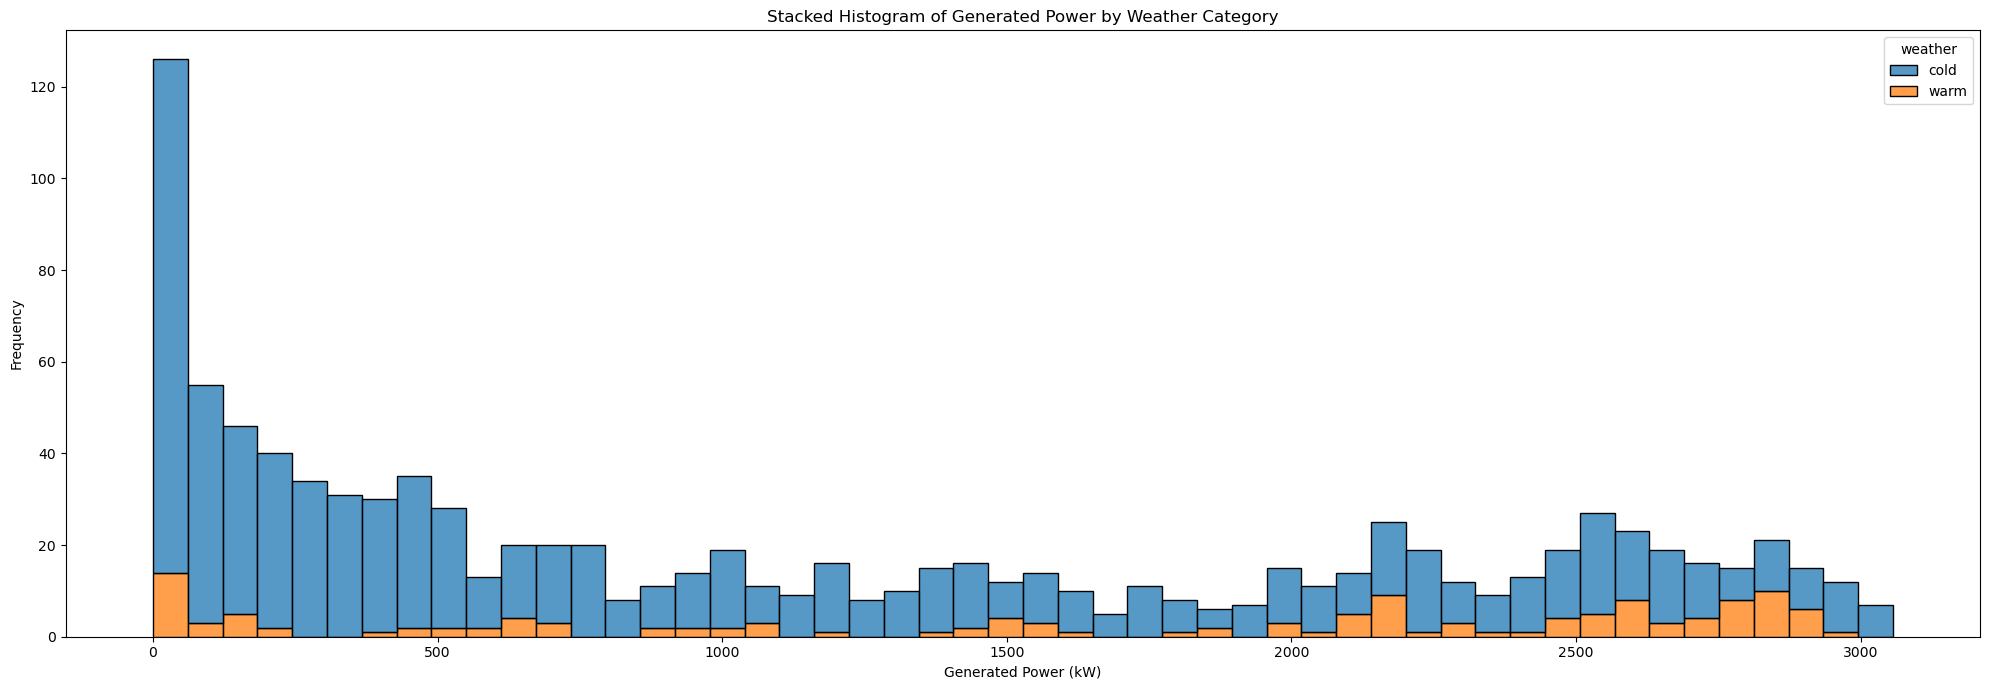

In [651]:
plt.figure(figsize=(20, 7))
ax = sns.histplot(
    data=solar_df,
    x='generated_power_kw',
    hue='weather',
    multiple='stack',
    bins=50
)
ax.set_title("Stacked Histogram of Generated Power by Weather Category")
ax.set_xlabel("Generated Power (kW)")
ax.set_ylabel("Frequency")
plt.tight_layout()

filename_h = f"histogram_Power_by_Weather.png"
filepath_h = os.path.join(output_plot, filename_h)
plt.savefig(filepath_h, dpi=300)

plt.show()

plt.close()

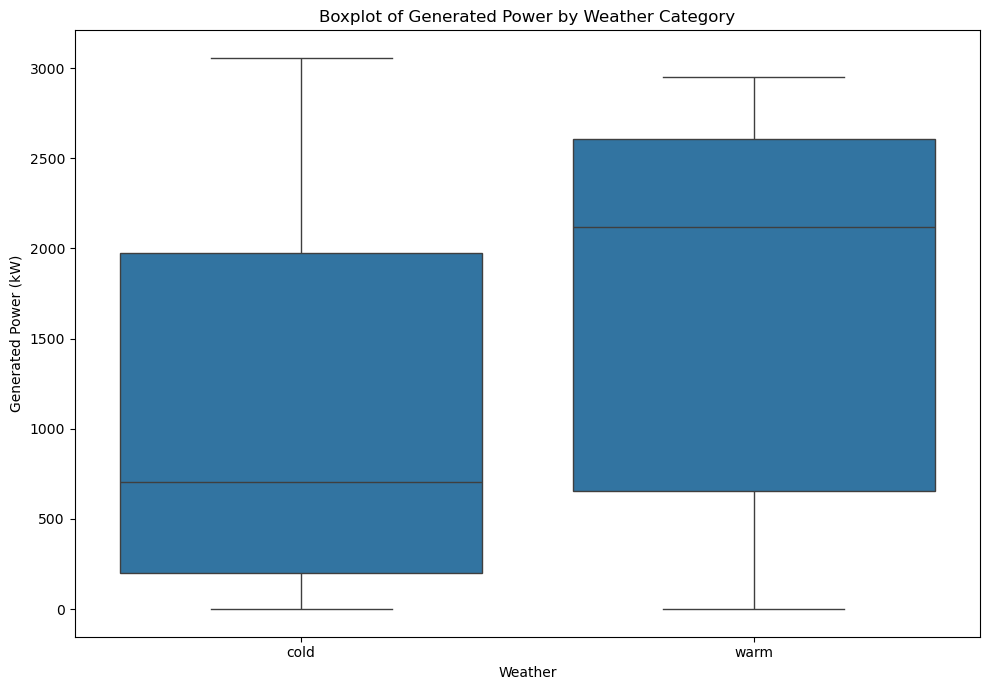

In [652]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=solar_df, 
    x='weather', 
    y='generated_power_kw'
)
plt.title("Boxplot of Generated Power by Weather Category")
plt.xlabel("Weather")
plt.ylabel("Generated Power (kW)")
plt.tight_layout()

filename_b = f"boxplot_Power_separated_by_Weather.png"
filepath_b = os.path.join(output_plot, filename_b)
plt.savefig(filepath_b, dpi=300) 

plt.show()

plt.close()

# 5. Covariance, Pearson Correlation, Spearman Rank Correlation and comparison on two diffrent calculation method

In this part, we are going to calculate Covariance, Pearson Correlation, Spearman Rank Correlation between two variables, which are 'generated_power_kw' and 'temperature_2_m_above_gnd'

and for this, also going to compare on manual(Brute-Force) and std.library (mostly Scipy.stats). But first we need to know notion on Covariance, Pearson Correlation Coefficient and Spearman Rank Correlation Coefficient.

Covariance

Covariance's purpose is to calculate how two variables depends each other, showing as numerical figures

For instance, when one variable does have tendency to decrease/increase from mean value, Covariance is here to demonstrate what another variable follows as the variable changes. (So more like "how it changes when one variable`s value changes')

Pearson Correlation Coefficient (Ref: https://www.statology.org/pearson-correlation-coefficient/)

This shows the linear association between two variables, and does have value from -1 to 1. (For that, it has a shortcoming of cannot show non-linear relationships)

When -1, two variables do have negative linear correlation. In opposite (when the covariance is 1), it would have positive linear correaltion between two variables

When 0, two variables doesn`t show any linear correlation.

$$
r = \frac{\operatorname{cov}(x, y)}{\sqrt{\operatorname{cov}(x, x)} \cdot \sqrt{\operatorname{cov}(y, y)}}
$$

Spearman Rank Correlation Coefficient (Ref : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/spearman-rank-correlation-definition-calculate/)

Since you may have known that Pearson Correlation Coefficient only shows linear relationships, this is where the Spearman comes in for other 'cases'.

Spearman Rank Correaltion Coefficient is to measure correlation between two variables based on their 'ranked values'. Ranging from -1 to 1, same as Pearson. And meaning is also similar to Pearson as well (If negative, then having deceasing monotonic(음의 단조 관계, 반비레적으로 일치) whilst in opposite being Positive (양의 단조관계, 순위가 비레적으로 일치)). And lastly, zero being having no diffrence between ranks. (meaning no relationships)

For measuring the coefficient, you have to rank the data (like smallest having rank 1 and increasing rank from smallest to biggest), calculating the diffrence between two variables, squaring them (since we need to know on scalar diffrence) summing up, then put them in formula in this following

$$
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$$

$\rho$ = Spearman Coefficient

n = sample count

$d_i$ = square of diffrence between two variables' rank



So let`s go for Manual (Brute-Force) calculation

In [653]:
def covariance(x, y):
    # computing covariance between two variables, x and y
    mean_x = mean(x)
    mean_y = mean(y)
    return sum((xi - mean_x)*(yi - mean_y) for xi, yi in zip(x, y)) / (len(x) - 1)

In [654]:
def pearson_correlation(x, y):
    # computing pearson correlation coefficient using pre-defined covariance
    cov_xy = covariance(x, y)
    std_x = (covariance(x, x))**0.5
    std_y = (covariance(y, y))**0.5
    return cov_xy / (std_x * std_y)

In [655]:
def spearman_correlation(x, y):
    # computing spearman correlation coefficient 
    n = len(x)
    x_sort = sorted(x)
    x_ranks = [x_sort.index(xi) + 1 for xi in x]

    y_sort = sorted(y)
    y_ranks = [y_sort.index(yi) + 1 for yi in y]

    d_sum = sum((xr - yr) ** 2 for xr, yr in zip(x_ranks, y_ranks))
    rho = 1 - (6 * d_sum) / (n * (n ** 2 - 1))
    return rho

In [656]:
x_data = solar_df['generated_power_kw'].tolist()
y_data = solar_df['temperature_2_m_above_gnd'].tolist()

In [657]:
cov = covariance(x_data, y_data)
pearson = pearson_correlation(x_data, y_data)
spearman = spearman_correlation(x_data, y_data)

In [658]:
print("Brute Force Calculation Result")
print(f"Covariance: {cov}")
print(f"Pearson Correlation: {pearson}")
print(f"Spearman Correlation: {spearman}")

Brute Force Calculation Result
Covariance: 1779.3410193473
Pearson Correlation: 0.29852433798310885
Spearman Correlation: 0.2545496545496545


Now for using Std.library using scipy.stats

In [659]:
from scipy.stats import pearsonr, spearmanr

cov_std = np.cov(x_data, y_data, ddof=1)[0, 1]  # in Numpy, np.cov outputs the covariance matrix, and [0, 1] or [1, 0] outputs cov(x, y) whilst [0, 0] is var[x], [1, 1] is var(y)
pearson_std= pearsonr(x_data, y_data)  
spearman_std= spearmanr(x_data, y_data)
# When using pearsonr/spearmanr, it outputs stastic value and pvalue. But what pvalue does is that showing whether if two variables' relationship is meaningful or not (must be smaller)
# so what we need to see is the 'Statistic' value.

In [660]:
print("Std.Library Calculation Result")
print(f"Covariance: {cov_std}")
print(f"Pearson Correlation: {pearson_std}")
print(f"Spearman Correlation: {spearman_std}")

Std.Library Calculation Result
Covariance: 1779.3410193473
Pearson Correlation: PearsonRResult(statistic=0.29852433798310873, pvalue=4.952712923381282e-22)
Spearman Correlation: SignificanceResult(statistic=0.2546856161045316, pvalue=2.8611966118176315e-16)


# 6. Heatmap of Correlation Coefficients

Now it's time for Correlation Heatmap on Correlation Coefficients on Variables in Dataframe

for this, there should be a need of each variables into respective numerical dataframe which will be numeric_cols for making heatmap
then make matrix of Pearson/Spearman Correlation and plot, export to png.

In [661]:
numeric_cols = solar_df.select_dtypes(include=[np.number])

corr_pearson = numeric_cols.corr(method='pearson')
corr_spearman = numeric_cols.corr(method='spearman')

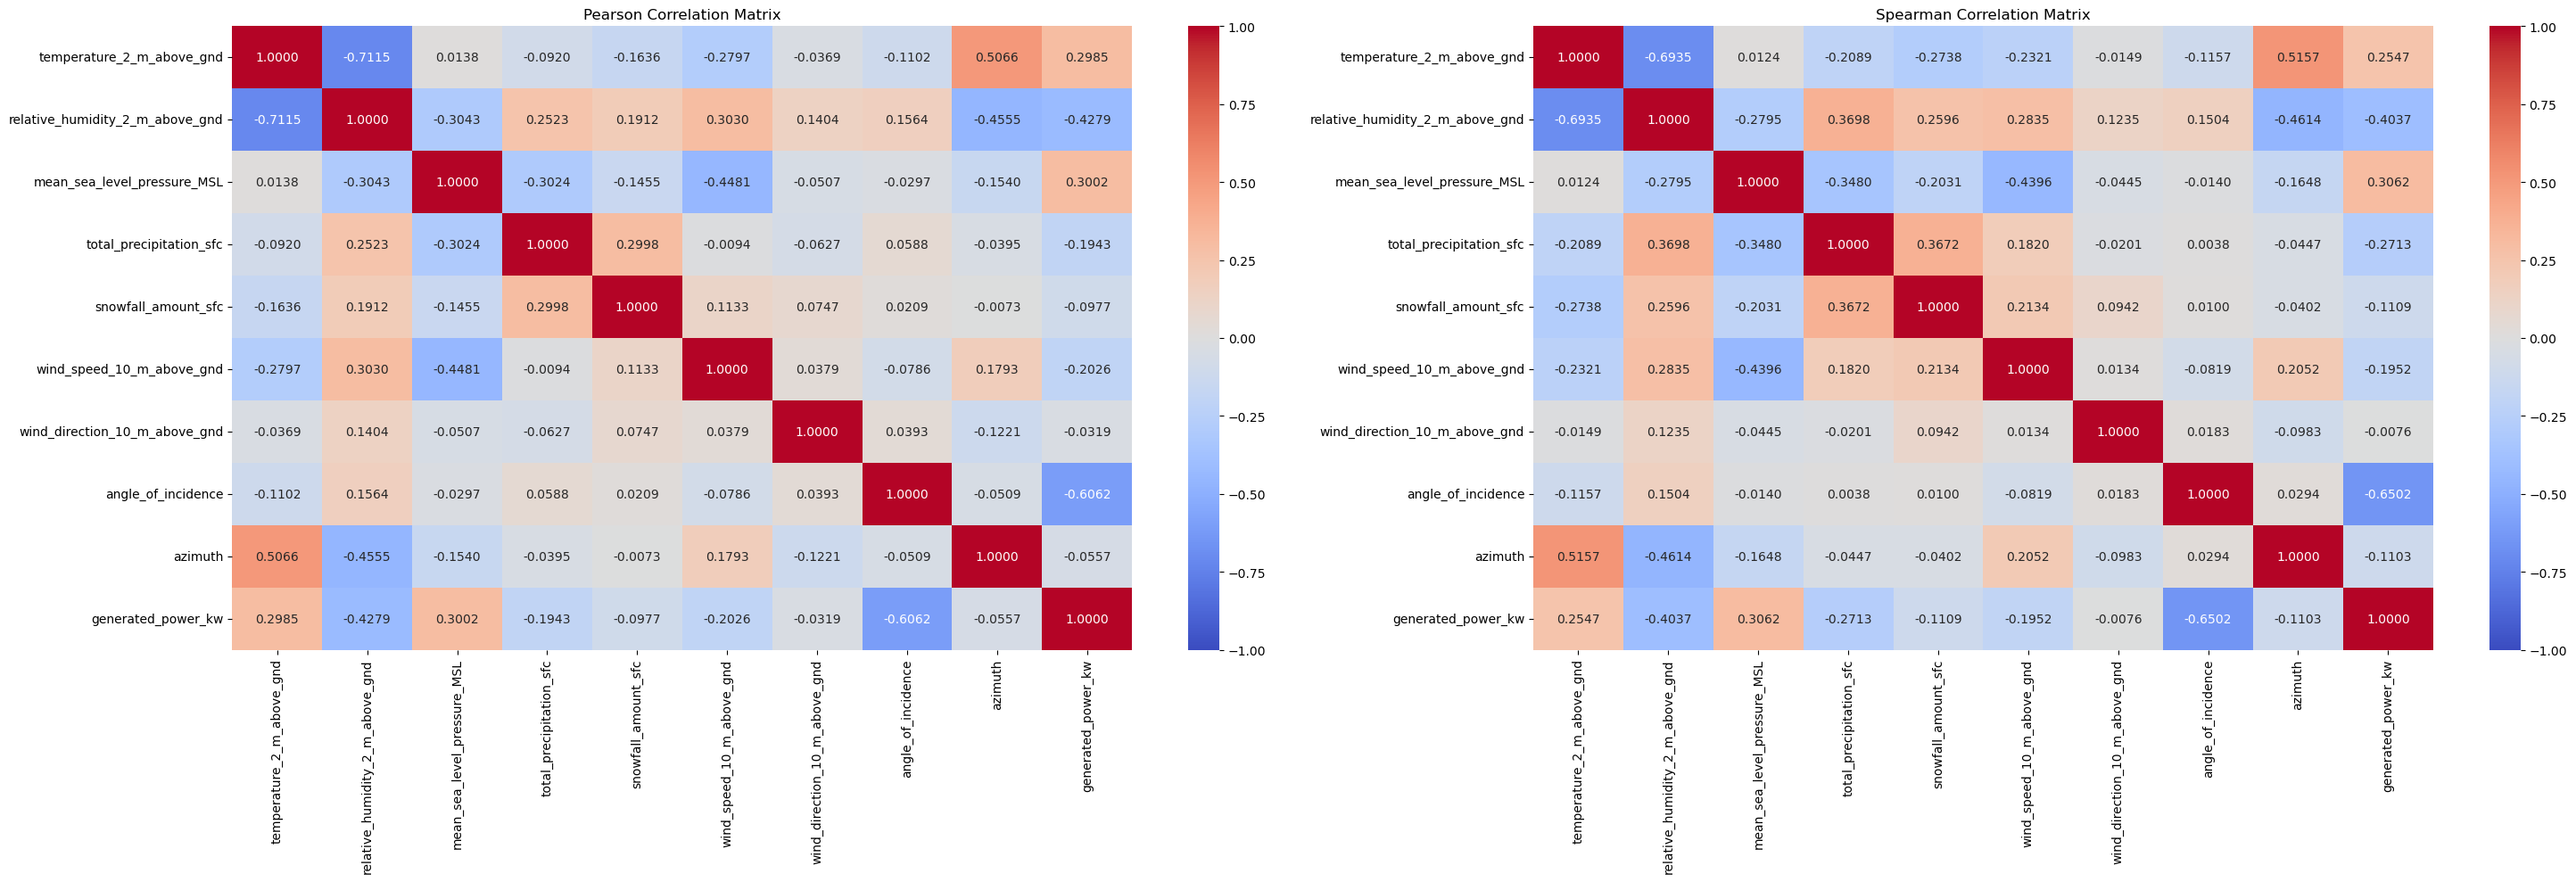

In [662]:
plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".4f")
plt.title("Pearson Correlation Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".4f")
plt.title("Spearman Correlation Matrix")

filename_heat = f"Heatmap_Correlation_Matrix.png"
filepath_heat = os.path.join(output_plot, filename_heat)
plt.savefig(filepath_heat, dpi=300) 

plt.tight_layout()
plt.show()

# 7. Scatter Plots on 'generated_power_kw' and other variable in Dataframe

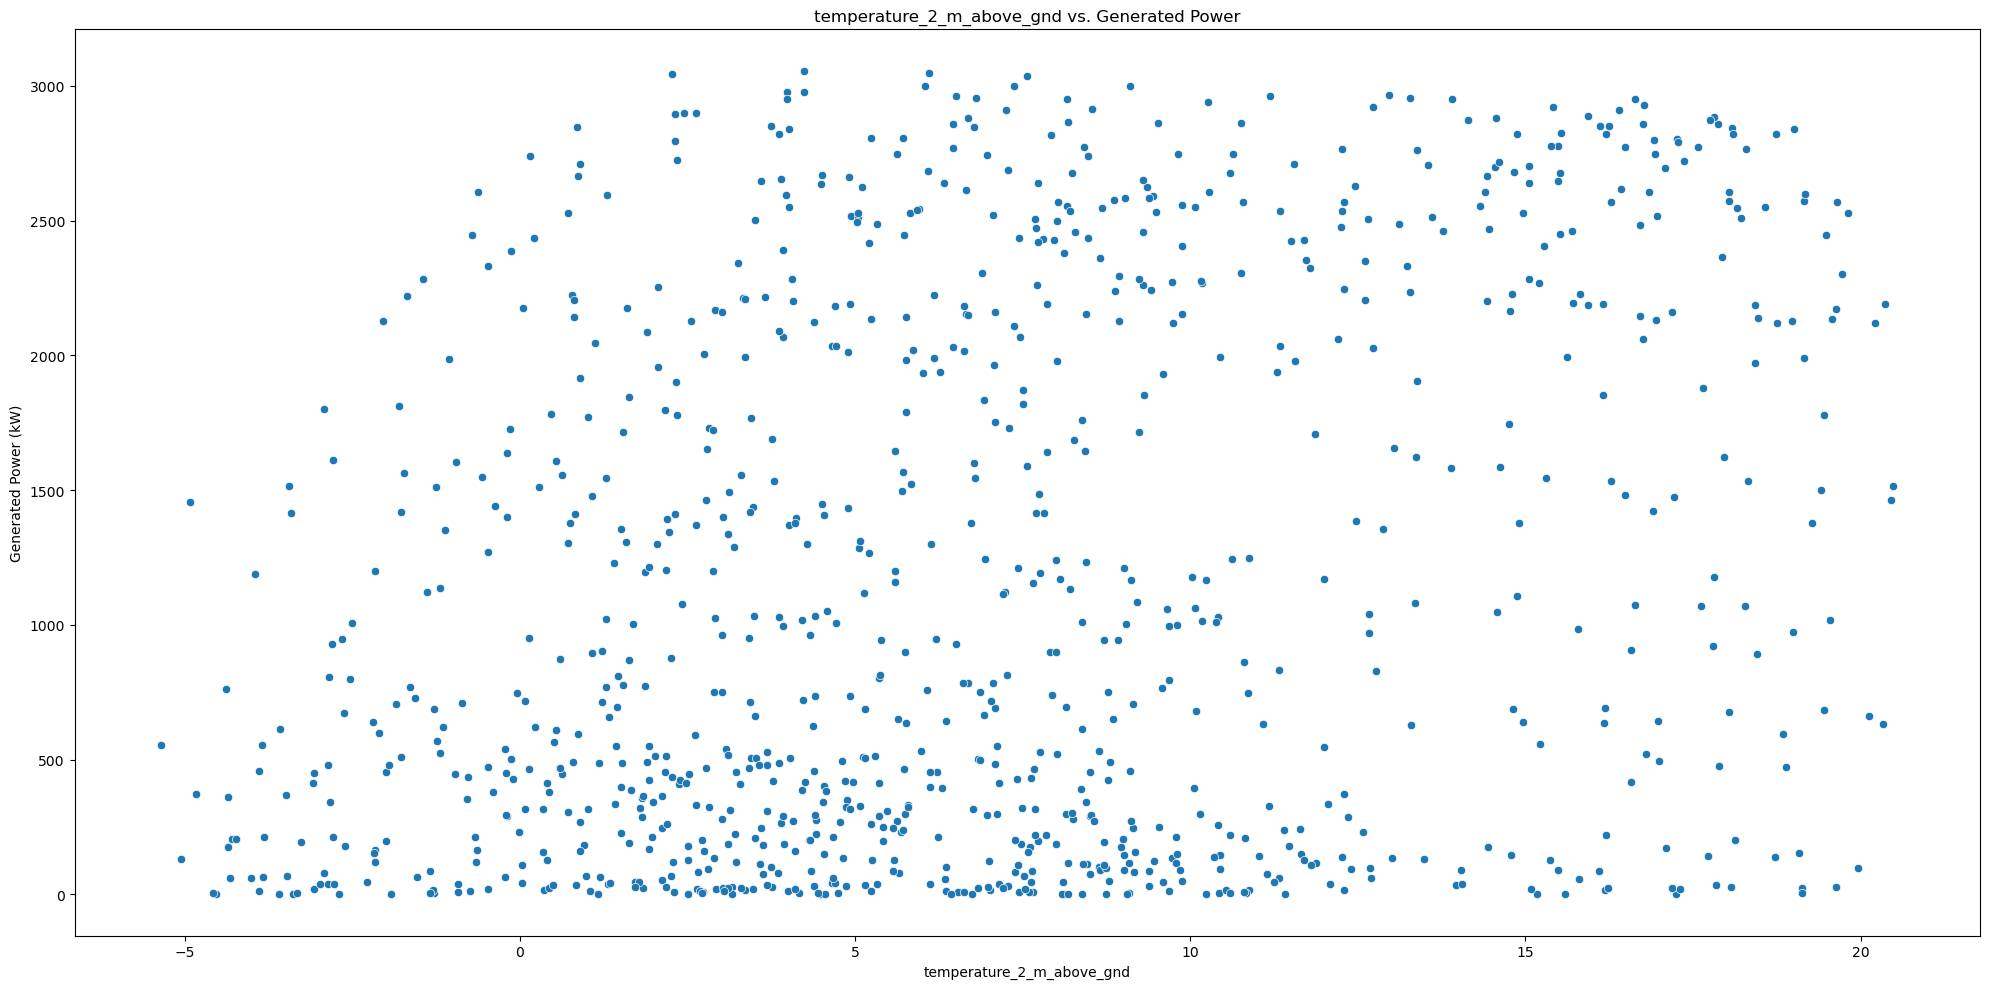

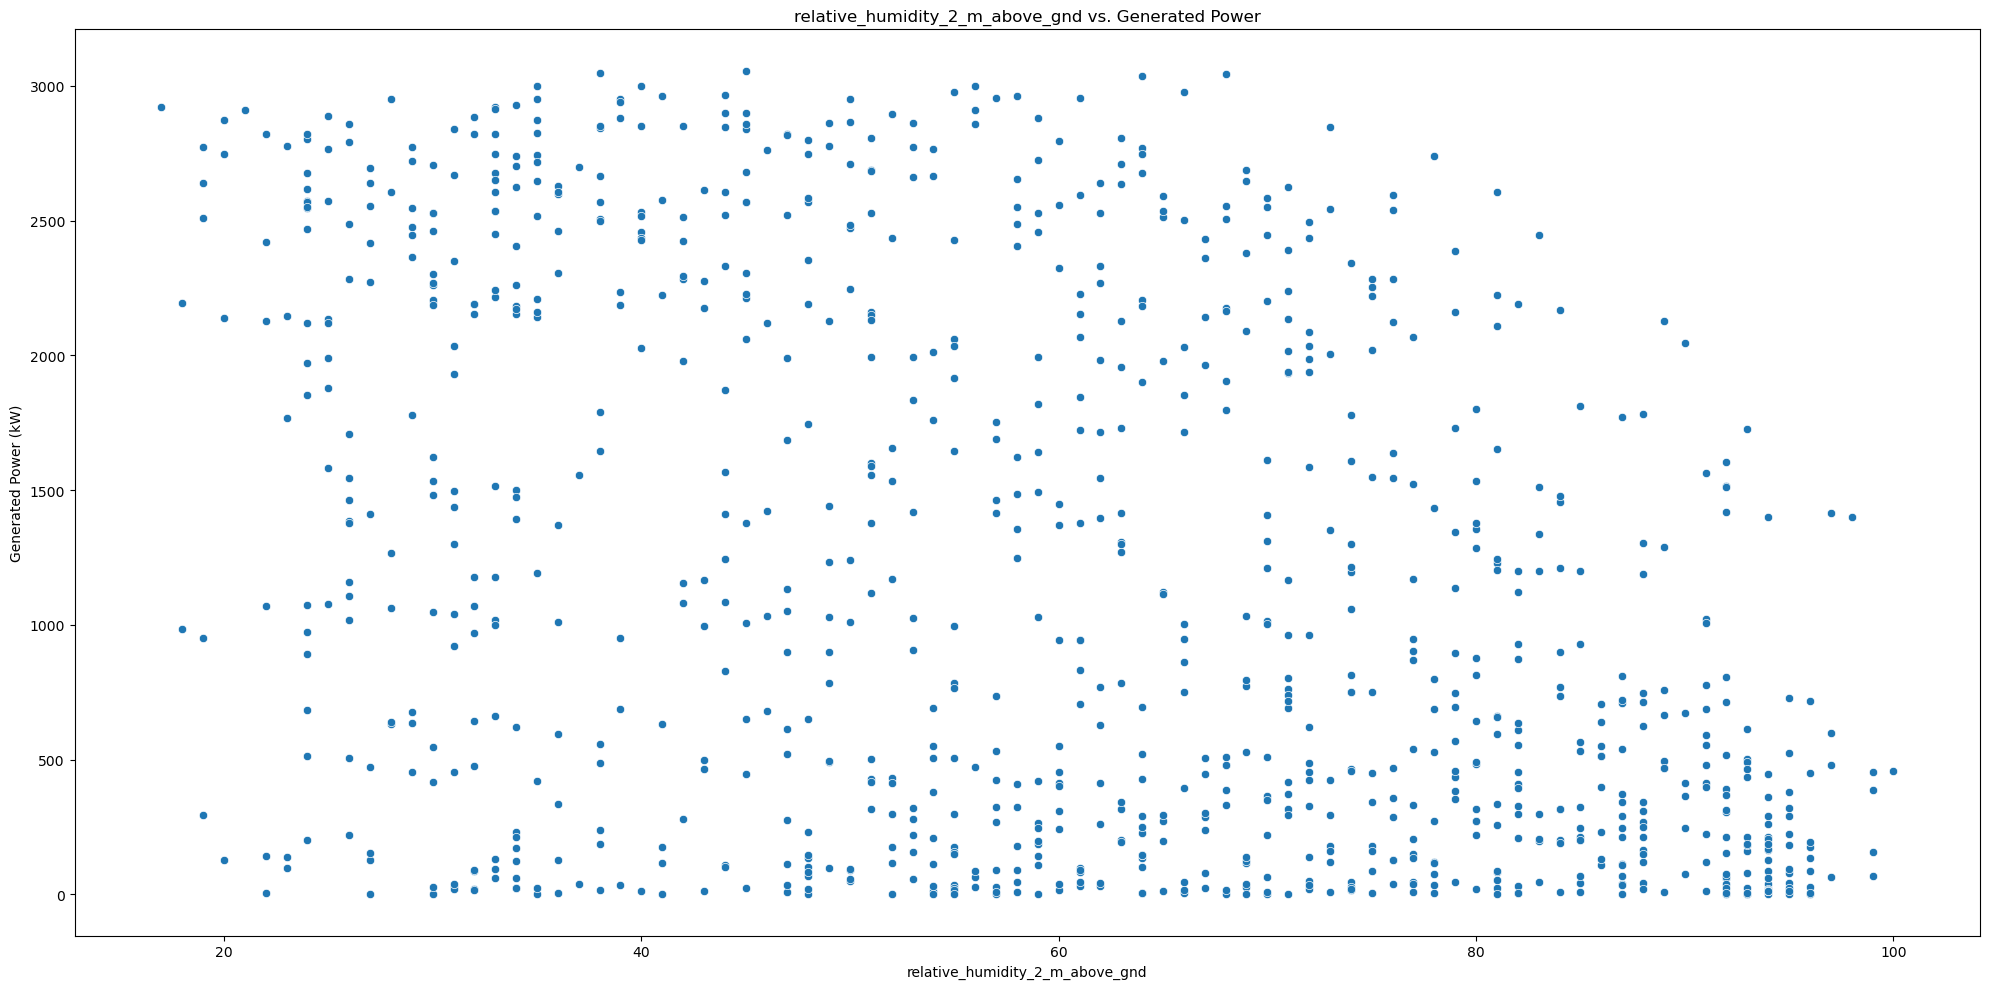

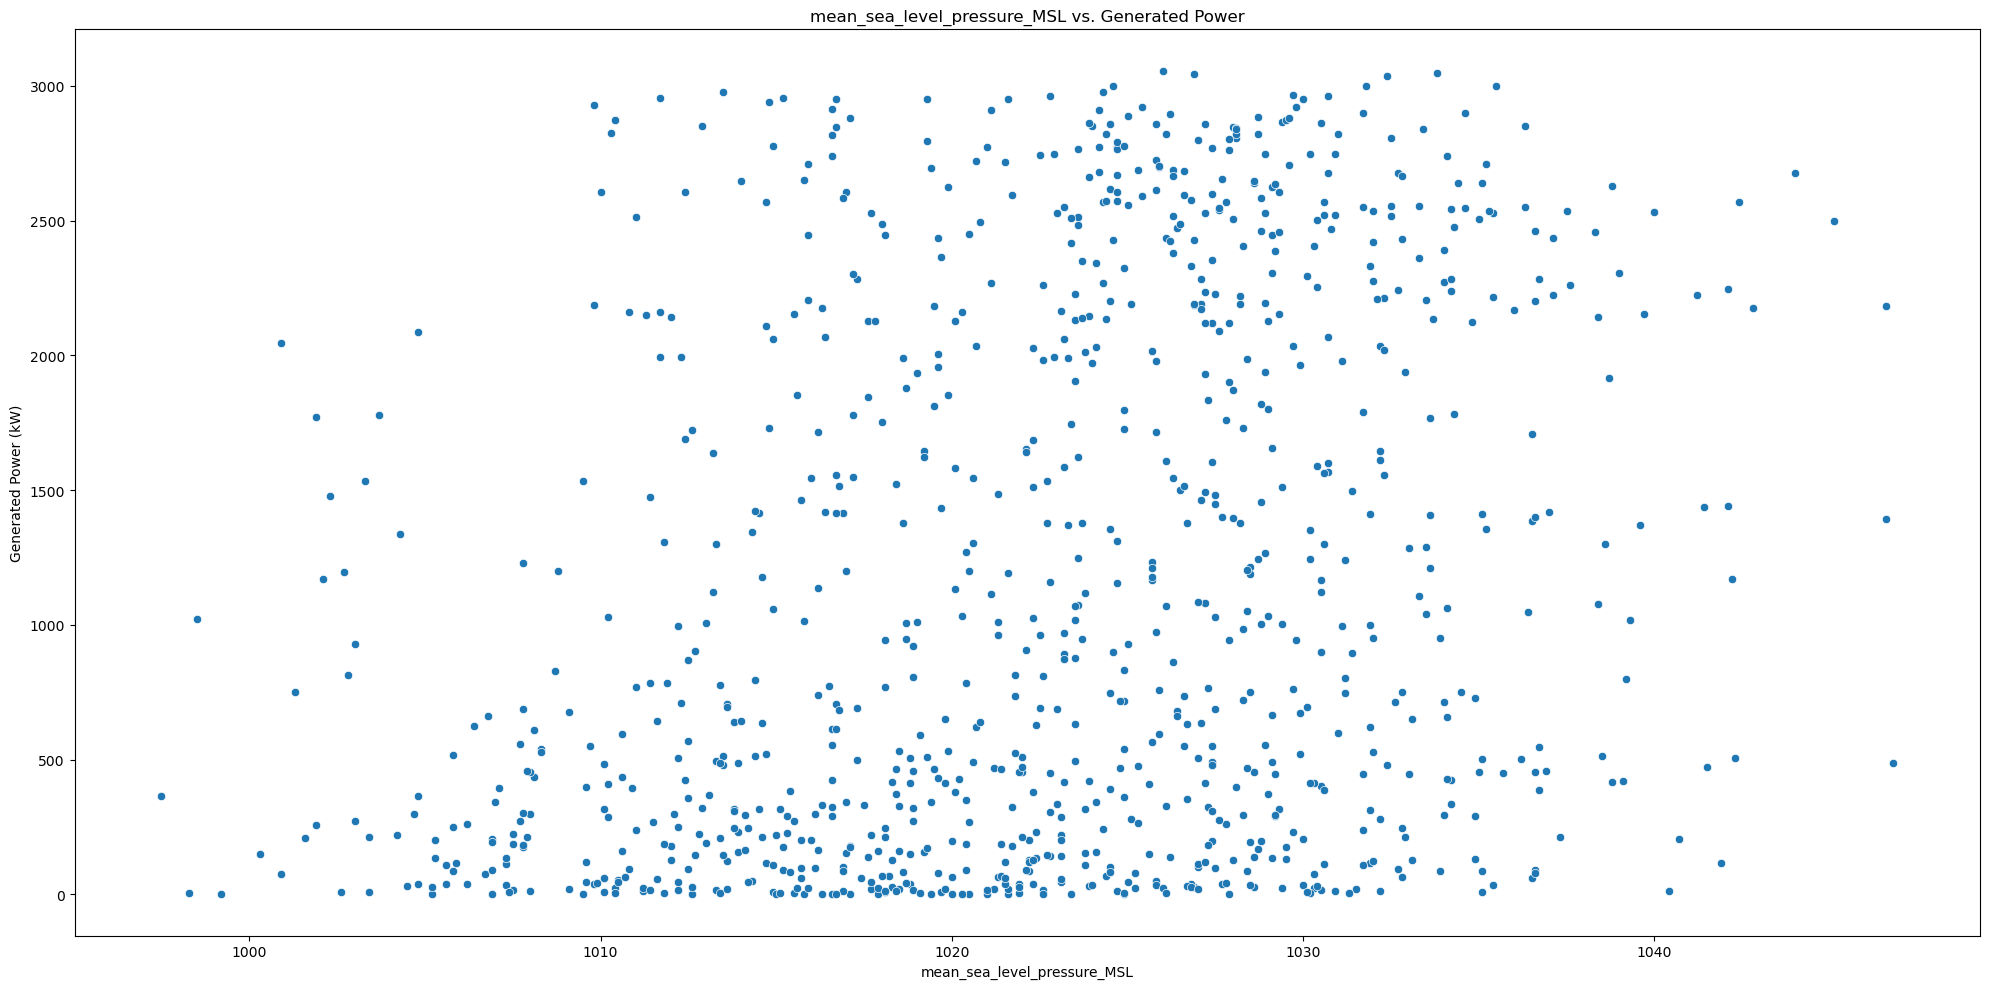

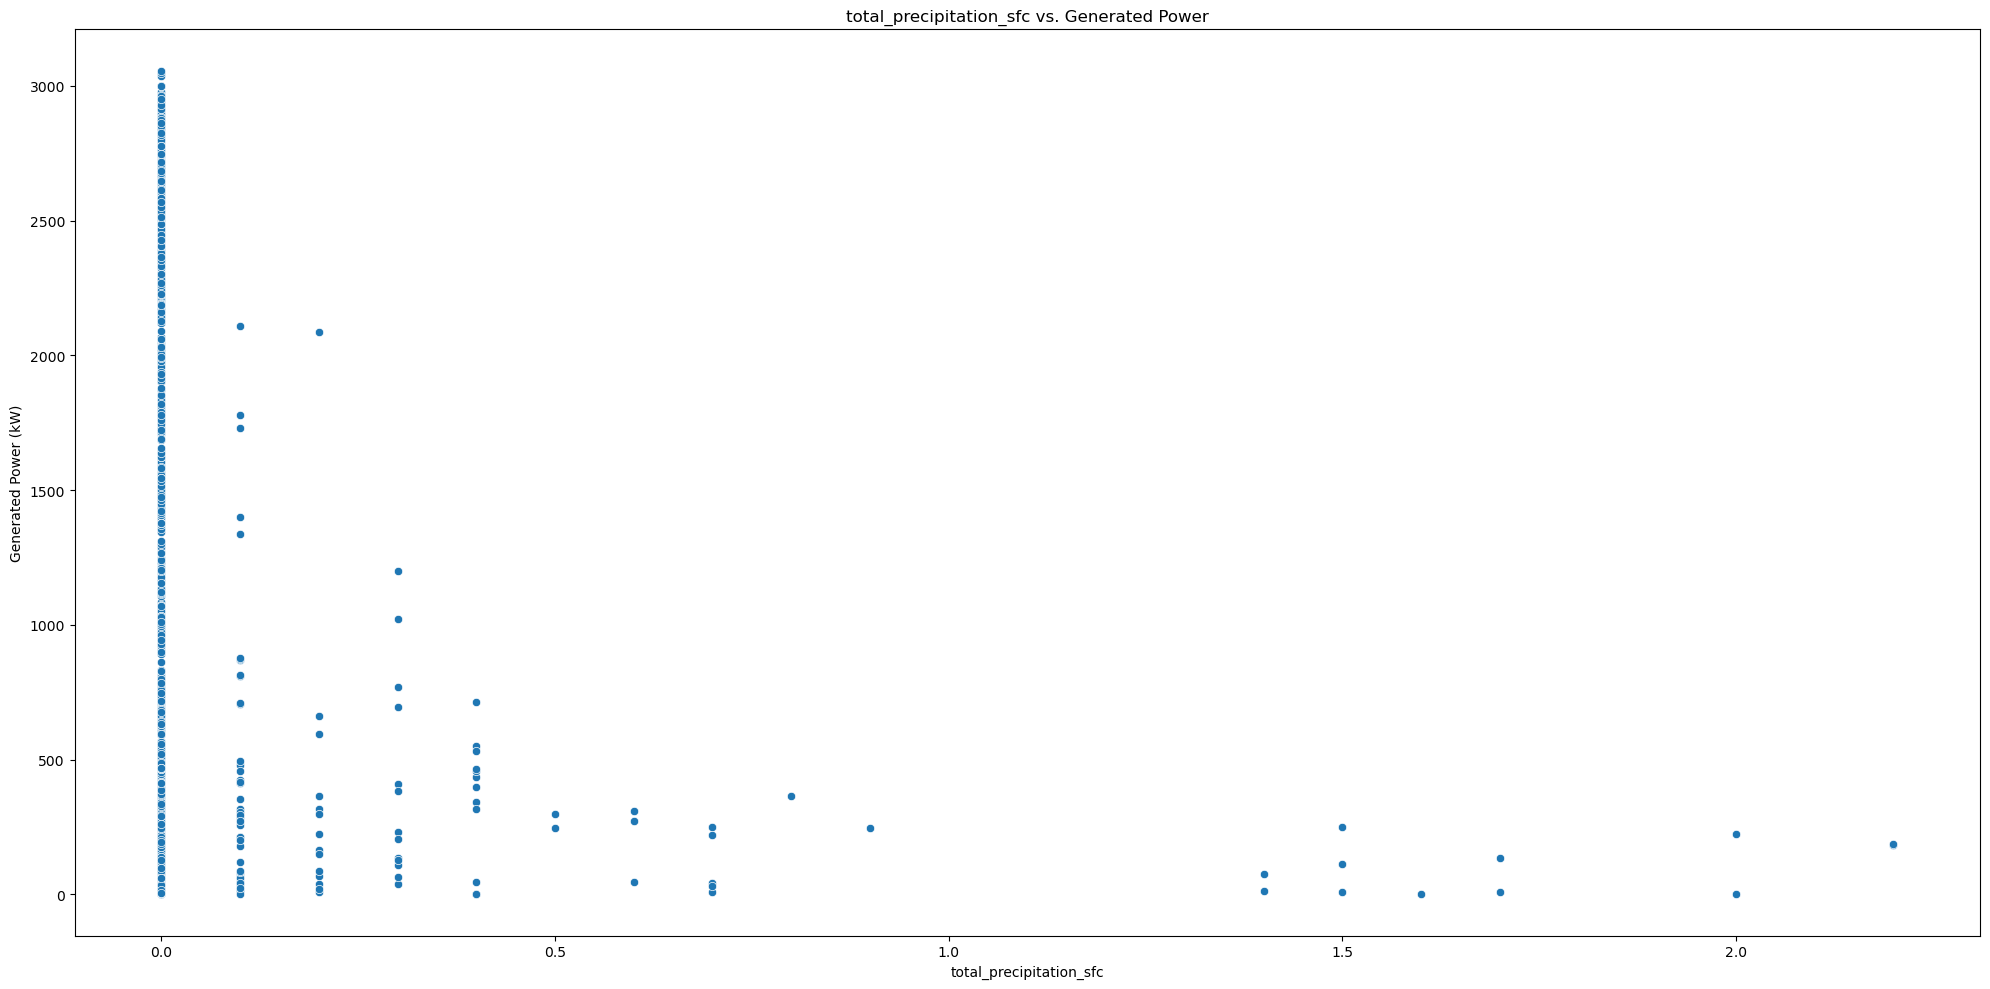

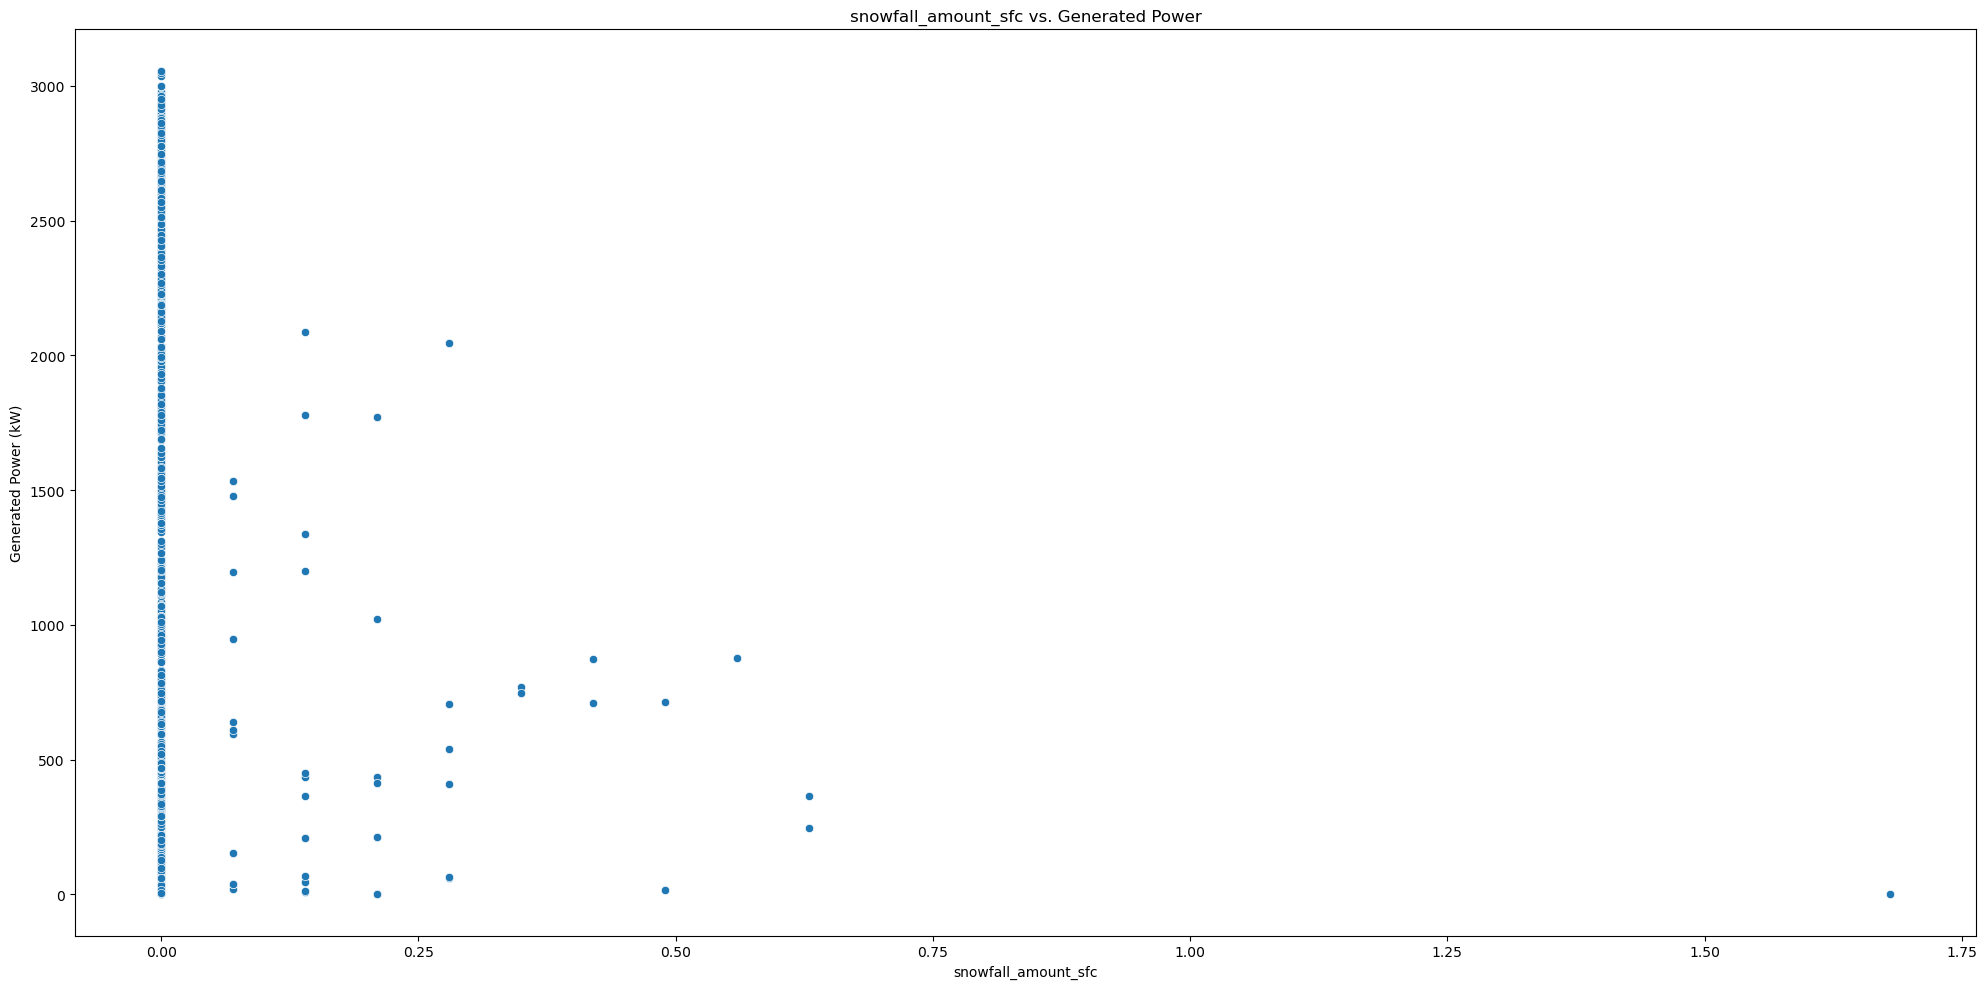

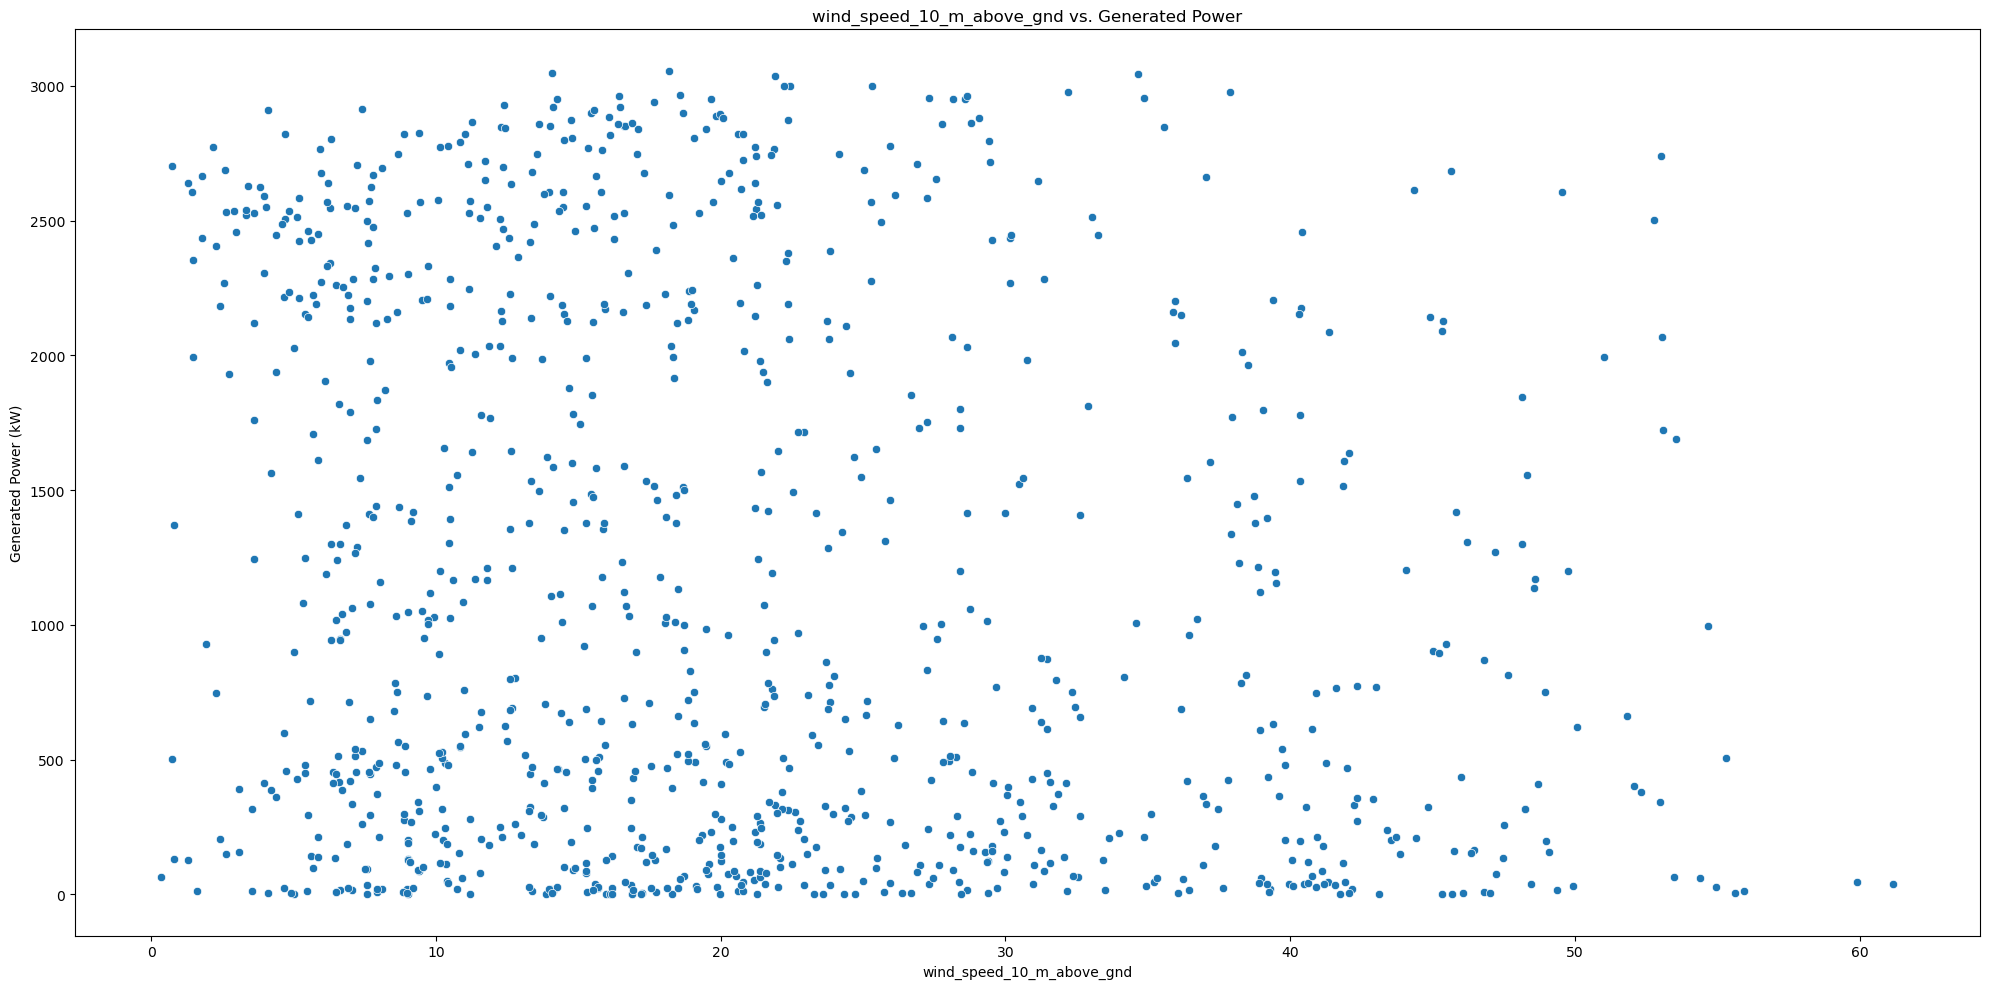

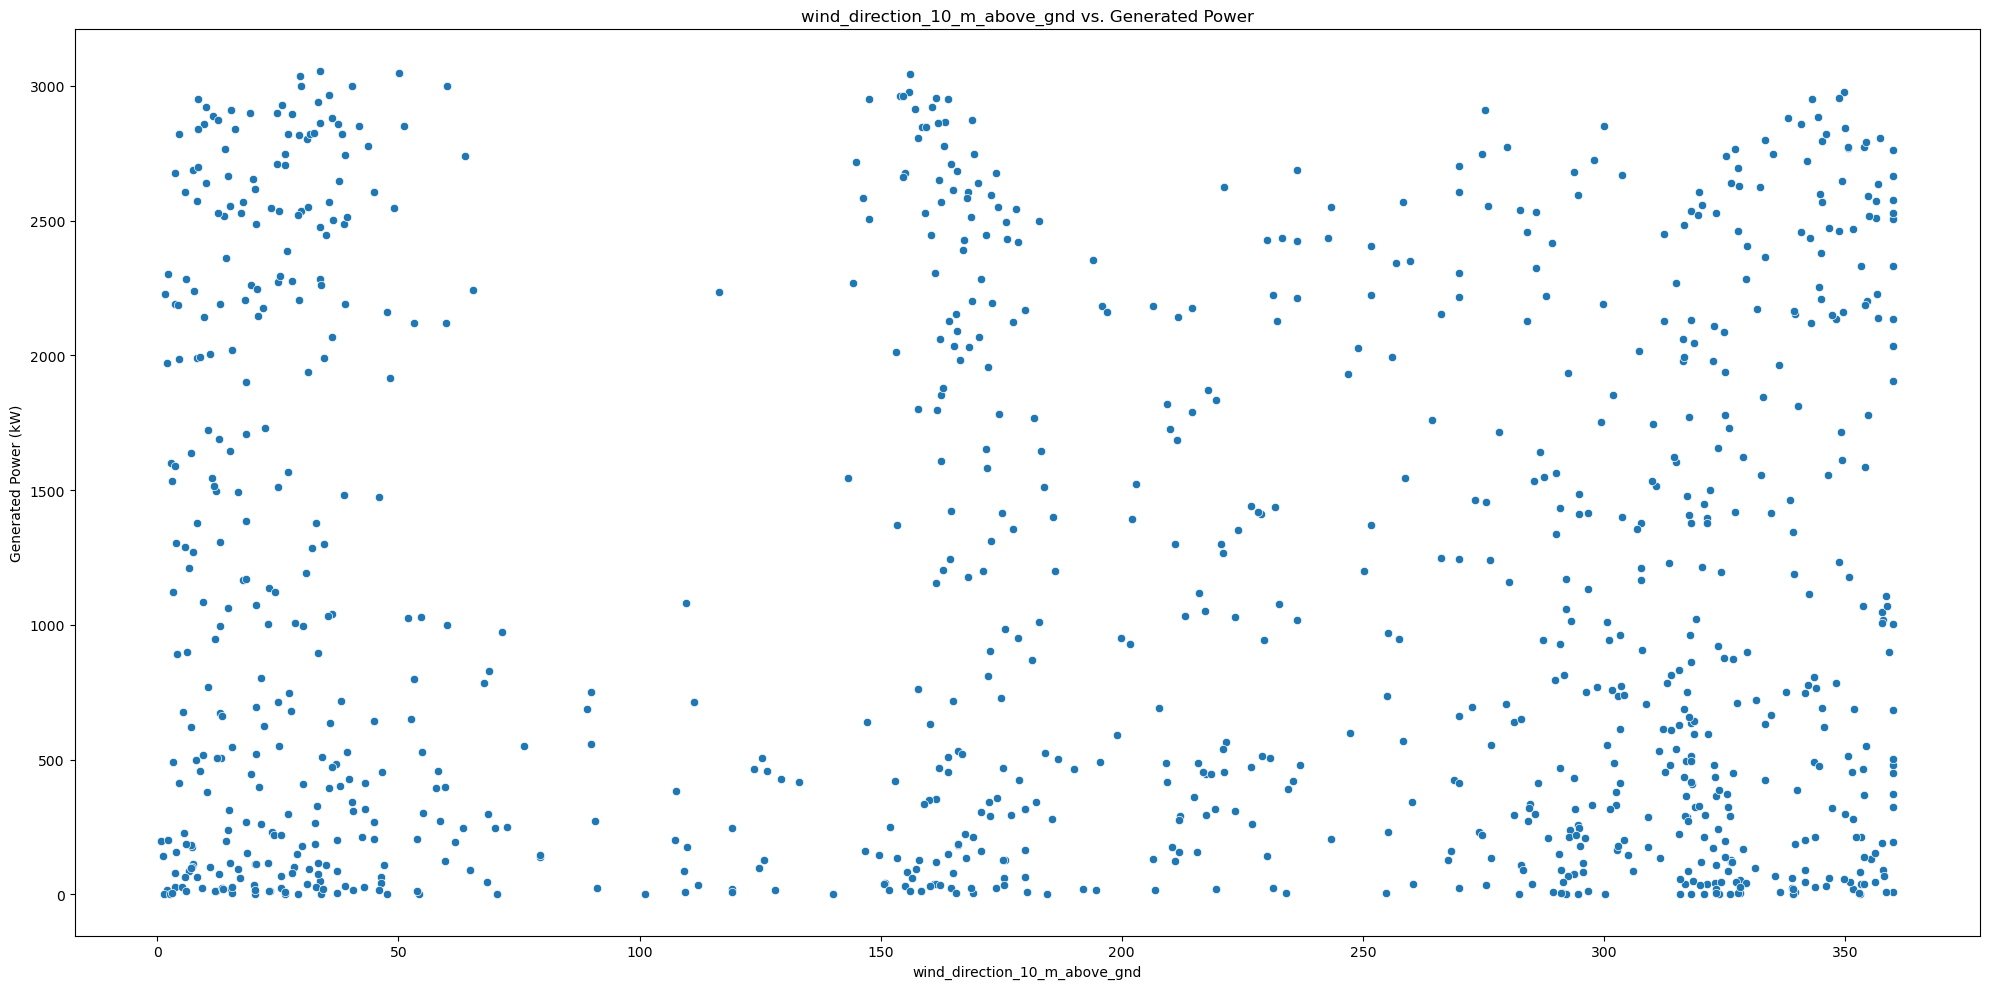

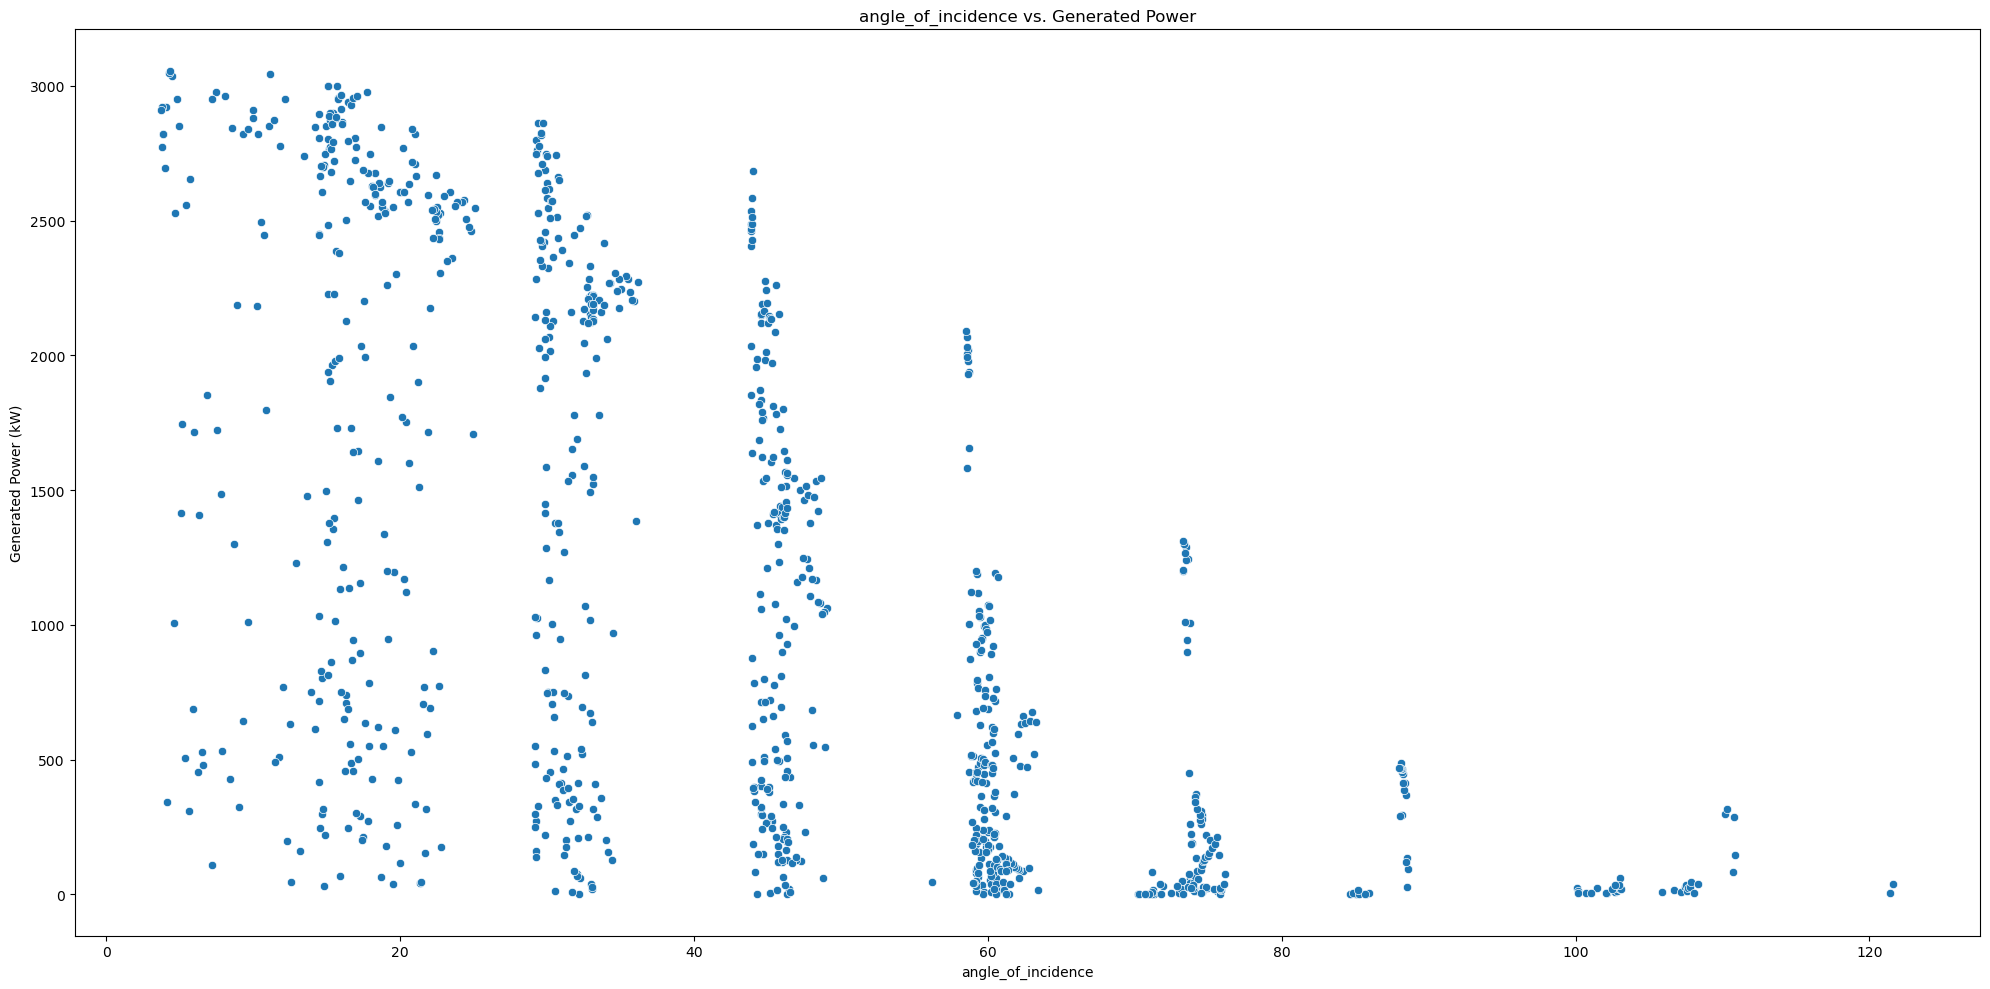

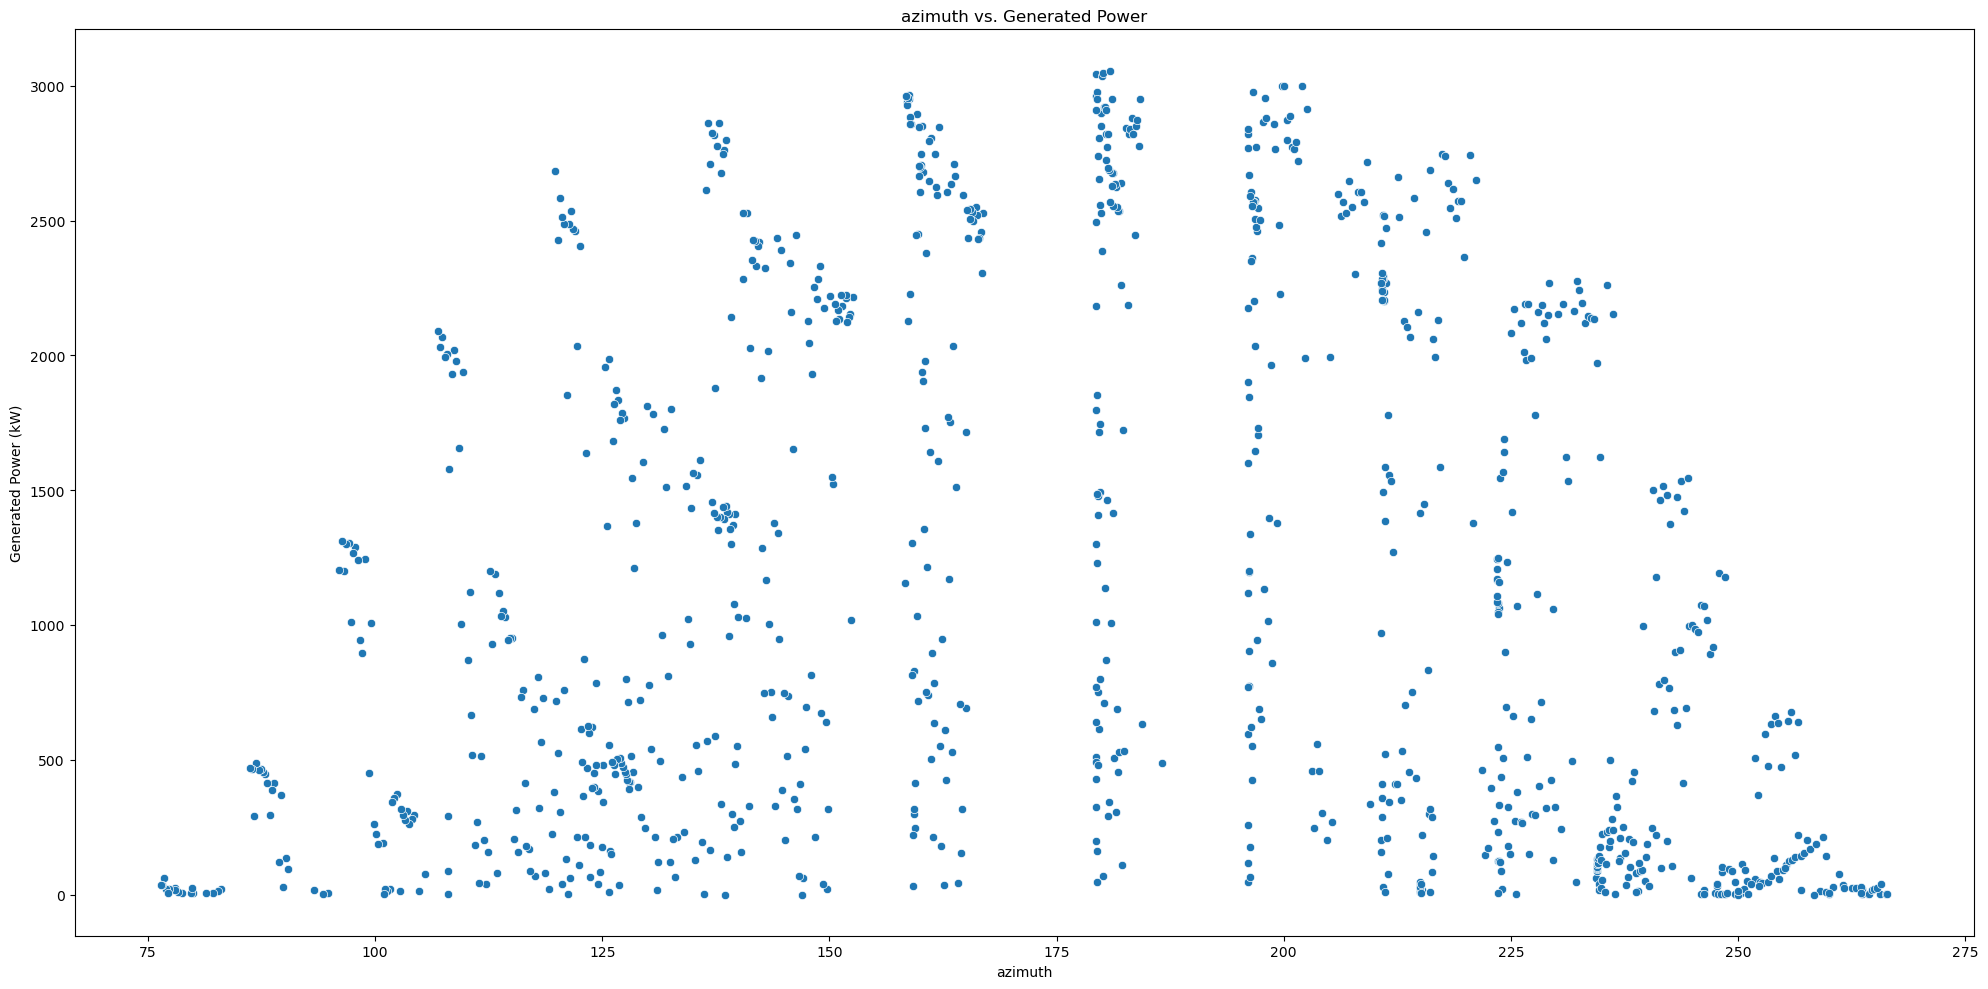

In [663]:
for col in numeric_cols.columns:
    if col != 'generated_power_kw':
        plt.figure(figsize=(20, 10))
        sns.scatterplot(
            data=solar_df,
            x=col,
            y='generated_power_kw'
        )
        plt.title(f"{col} vs. Generated Power")
        plt.xlabel(col)
        plt.ylabel("Generated Power (kW)")
        plt.tight_layout()

        filename_his_r = f"Generated Power_{col}.png"
        filepath_his_r = os.path.join(output_plot_var, filename_his_r)
        plt.savefig(filepath_his_r, dpi=300) 
        plt.show()

        plt.close()

Analysis on Plots and Values will be on 

'12201449_Choi_Chan_Woo_Analysis_on_Solar_Energy.docx'

in submission and on source folder

# Appendix. Full Dataset (with 'weather')

In [664]:
solar_df.to_csv('output/full_dataset.csv', index=False)
# Exporting Full Dataset for Validation Purpose

PermissionError: [Errno 13] Permission denied: 'output/full_dataset.csv'